# PROBLEM STATEMENT
In the medical science sector, accurate and timely disease identification remains a critical challenge, especially in cases where patients present with overlapping or ambiguous symptoms. Delays or errors in diagnosis can lead to ineffective treatments, increased healthcare costs, and, in severe cases, loss of life.

# OBJECTIVE
To address this challenge, I aim to develop a deep learning–based diagnostic tool that can analyze a wide range of patient symptoms and accurately predict the most likely disease from a predefined set of 32 possible conditions. The model will be trained on a comprehensive dataset containing 142 symptom-related features, making it capable of recognizing complex patterns that may be difficult for human clinicians to detect unaided.

**This project is designed to serve as a clinical decision-support system, enhancing the diagnostic process by providing a fast, data-driven second opinion to medical professionals.**



In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [59]:
df = pd.read_csv('Training.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
df.shape

(4920, 134)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


With this dataset, I believe I can achieve my goal of building a reliable deep learning model that assists the medical field in accurately identifying diseases based on a wide range of symptoms.

In [6]:
df['prognosis'].nunique()

41

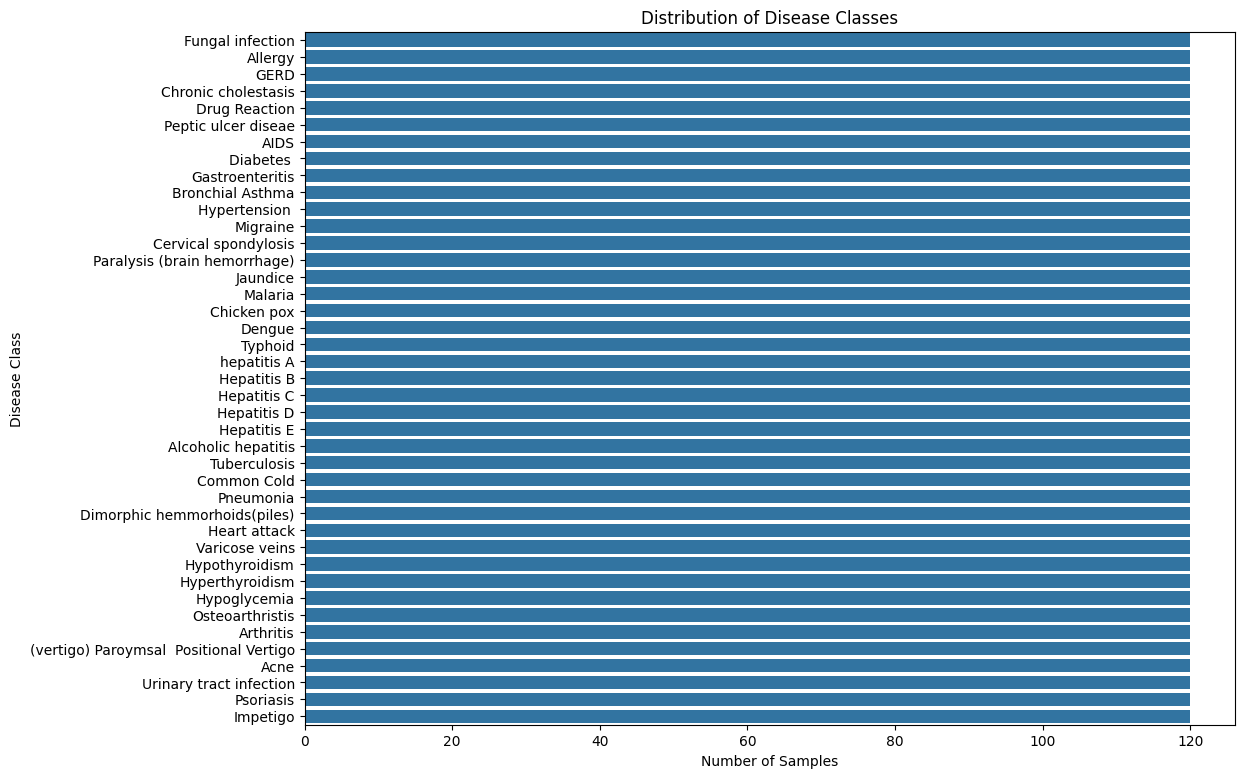

In [7]:
plt.figure(figsize=(12,9))
sns.countplot(y=df['prognosis'])  
plt.title("Distribution of Disease Classes")
plt.xlabel("Number of Samples")
plt.ylabel("Disease Class")
plt.show()

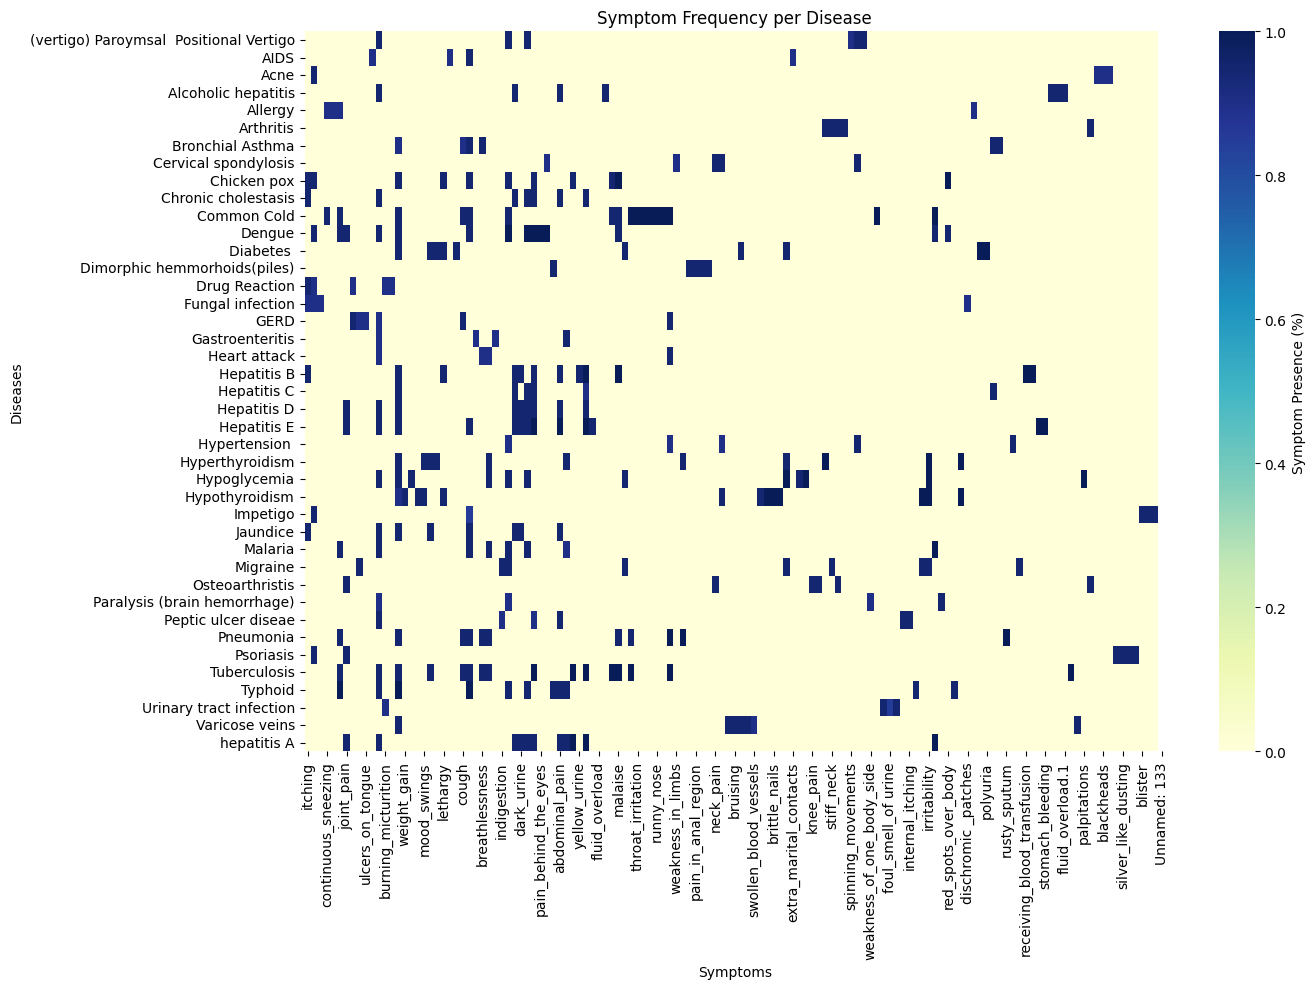

In [8]:
# The frquency of symptoms by Diseases
symptom_means = df.groupby('prognosis').mean()

plt.figure(figsize=(14, 10))
sns.heatmap(symptom_means, cmap="YlGnBu", cbar_kws={'label': 'Symptom Presence (%)'})
plt.title("Symptom Frequency per Disease")
plt.xlabel("Symptoms")
plt.ylabel("Diseases")
plt.tight_layout();

In [9]:
# Top symptoms By Diseases
for disease in df['prognosis'].unique():
    symptoms_only = df[df['prognosis'] == disease].drop(columns='prognosis')
    top_symptoms = symptoms_only.mean().sort_values(ascending=False)[:10]
    print(f"Top symptoms for {disease}:\n{top_symptoms.index.tolist()}\n")

Top symptoms for Fungal infection:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic _patches', 'continuous_sneezing', 'shivering', 'joint_pain', 'chills', 'acidity', 'ulcers_on_tongue']

Top symptoms for Allergy:
['continuous_sneezing', 'watering_from_eyes', 'chills', 'shivering', 'nodal_skin_eruptions', 'skin_rash', 'itching', 'joint_pain', 'acidity', 'ulcers_on_tongue']

Top symptoms for GERD:
['cough', 'chest_pain', 'stomach_pain', 'ulcers_on_tongue', 'acidity', 'vomiting', 'skin_rash', 'itching', 'continuous_sneezing', 'nodal_skin_eruptions']

Top symptoms for Chronic cholestasis:
['itching', 'yellowish_skin', 'nausea', 'vomiting', 'yellowing_of_eyes', 'abdominal_pain', 'loss_of_appetite', 'skin_rash', 'continuous_sneezing', 'nodal_skin_eruptions']

Top symptoms for Drug Reaction:
['itching', 'skin_rash', 'burning_micturition', 'stomach_pain', 'spotting_ urination', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'acidity', 'ulcers_on_tongue']

Top symptoms 

# WHY I CHOSE THIS MODEL
**The model i will be using is a Deep Neural Network (DNN) model, which is well-suited for this project because it can learn complex, non-linear relationships between a large number of binary symptom inputs and multiple disease classes, making it ideal for handling high-dimensional data like (142 features, 32 outputs). It’s will also be effective in capturing subtle symptom patterns that may not be obvious with traditional models.**

In [67]:
target = 'prognosis'
inputs = df.drop(target, axis=1)

X = inputs
y = df[target]

In [68]:
class_ = Counter(y)
print(class_)

Counter({'Fungal infection': 120, 'Allergy': 120, 'GERD': 120, 'Chronic cholestasis': 120, 'Drug Reaction': 120, 'Peptic ulcer diseae': 120, 'AIDS': 120, 'Diabetes ': 120, 'Gastroenteritis': 120, 'Bronchial Asthma': 120, 'Hypertension ': 120, 'Migraine': 120, 'Cervical spondylosis': 120, 'Paralysis (brain hemorrhage)': 120, 'Jaundice': 120, 'Malaria': 120, 'Chicken pox': 120, 'Dengue': 120, 'Typhoid': 120, 'hepatitis A': 120, 'Hepatitis B': 120, 'Hepatitis C': 120, 'Hepatitis D': 120, 'Hepatitis E': 120, 'Alcoholic hepatitis': 120, 'Tuberculosis': 120, 'Common Cold': 120, 'Pneumonia': 120, 'Dimorphic hemmorhoids(piles)': 120, 'Heart attack': 120, 'Varicose veins': 120, 'Hypothyroidism': 120, 'Hyperthyroidism': 120, 'Hypoglycemia': 120, 'Osteoarthristis': 120, 'Arthritis': 120, '(vertigo) Paroymsal  Positional Vertigo': 120, 'Acne': 120, 'Urinary tract infection': 120, 'Psoriasis': 120, 'Impetigo': 120})


In [69]:
le = LabelEncoder()

y_encoded = le.fit_transform(y)
print(len(np.unique(y_encoded)))

41


In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=30)

In [71]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(3936, 3936, 984, 984)

In [72]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train_cat.shape)
print(y_test_cat.shape)

(3936, 41)
(984, 41)


In [73]:
X_train.shape

(3936, 132)

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(132,)),
    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(41,activation='softmax')
])

In [83]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [84]:
callback = [EarlyStopping(monitor=('val_loss'),patience=10,restore_best_weights=True)]

In [85]:
history = model.fit(X_train,y_train, epochs=100, batch_size=32,callbacks=callback,validation_split=0.1)

Epoch 1/100


111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2731 - loss: 3.4911 - val_accuracy: 0.9873 - val_loss: 1.2560
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9231 - loss: 1.0701 - val_accuracy: 1.0000 - val_loss: 0.3541
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9802 - loss: 0.4950 - val_accuracy: 1.0000 - val_loss: 0.3036
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9890 - loss: 0.3946 - val_accuracy: 1.0000 - val_loss: 0.2857
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9959 - loss: 0.3551 - val_accuracy: 1.0000 - val_loss: 0.2725
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9929 - loss: 0.3385 - val_accuracy: 1.0000 - val_loss: 0.2592
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9952 - loss: 0.3157 - val_accuracy: 1.0000 - val_loss: 0.2465
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9968 - loss: 0.2966 - val_accuracy: 1.00

In [86]:
test_loss, test_accuracy = model.evaluate(X_test,y_test,verbose=2)

31/31 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0570


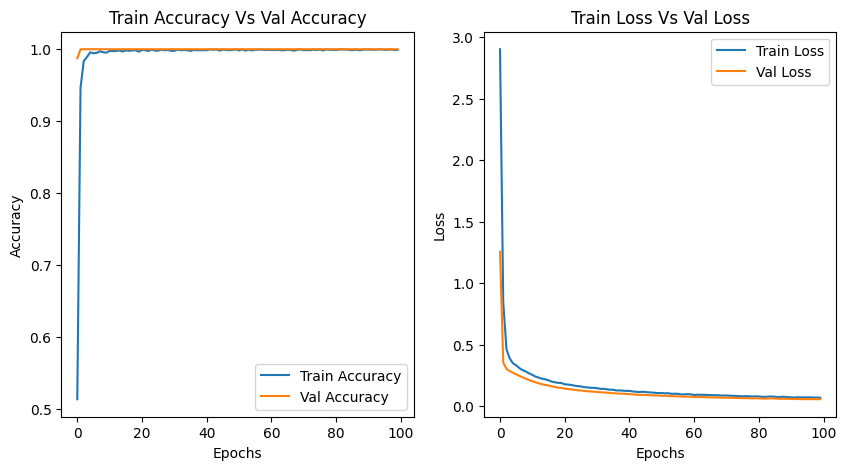

In [87]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy Vs Val Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss Vs Val Loss')
plt.legend()

In [93]:
prediction = model.predict(X_test)
predicted_classes = np.argmax(prediction,axis=1)
disease_name = le.inverse_transform(predicted_classes)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [99]:
y_test_array = np.array(y_test)
true_label = le.inverse_transform(y_test_array)

accuracy = np.mean(disease_name == y_test_array)
print('Test Accuracy = {accuracy}')

for i in range(10):
    print(f"Sample {i}: Predicted = {disease_name[i]}, True = {true_label[i]}")

Test Accuracy = {accuracy}
Sample 0: Predicted = Malaria, True = Malaria
Sample 1: Predicted = Cervical spondylosis, True = Cervical spondylosis
Sample 2: Predicted = Hepatitis D, True = Hepatitis D
Sample 3: Predicted = Bronchial Asthma, True = Bronchial Asthma
Sample 4: Predicted = Drug Reaction, True = Drug Reaction
Sample 5: Predicted = Common Cold, True = Common Cold
Sample 6: Predicted = GERD, True = GERD
Sample 7: Predicted = Pneumonia, True = Pneumonia
Sample 8: Predicted = Heart attack, True = Heart attack
Sample 9: Predicted = Chronic cholestasis, True = Chronic cholestasis


In [100]:
report = classification_report(true_label,disease_name)
print(report)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        18
                                   Acne       1.00      1.00      1.00        18
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       1.00      1.00      1.00        21
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       1.00      1.00      1.00        21
                            Chicken pox       1.00      1.00      1.00        31
                    Chronic cholestasis       1.00      1.00      1.00        23
                            Common Cold       1.00      1.00      1.00        17
                           

In [104]:
model.save('disease_predictor_model.keras')

In [105]:
import joblib
with open('label_encoder.pkl','wb') as f:
    joblib.dump(le,f)

In [106]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4074,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2523,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
457,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4634,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df1 = pd.read_csv('Book2.csv')
df1.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
prediction = model.predict(df1)
predicted_classes = np.argmax(prediction,axis=1)
disease_name = le.inverse_transform(predicted_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [110]:
for i in range(10):
    print(f"Sample {i}: Predicted = {disease_name[i]}")

Sample 0: Predicted = Fungal infection
Sample 1: Predicted = Allergy
Sample 2: Predicted = GERD
Sample 3: Predicted = Chronic cholestasis
Sample 4: Predicted = Drug Reaction
Sample 5: Predicted = Peptic ulcer diseae
Sample 6: Predicted = AIDS
Sample 7: Predicted = Diabetes 
Sample 8: Predicted = Gastroenteritis
Sample 9: Predicted = Bronchial Asthma


In [111]:
feature_name = X.columns.tolist()

In [112]:
joblib.dump({'feature_name':feature_name},'disease_metadata.joblib')

['disease_metadata.joblib']